## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

## Setting style and color palette

In [2]:
sns.set_style("darkgrid")
sns.set_context("notebook")
sns.set_palette("tab10")

## Importing Datasets

#### Reading data from .csv using pandas:

In [3]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

## Displaying data types

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Cleaning data

#### Renaming column names for easier reference:

In [6]:
df_train.rename(columns={"PassengerId": "id", "Survived": "survived", 
                   "Pclass": "class", "Name": "name", "Sex": "sex", 
                   "Age": "age", "SibSp": "sibling_spouse", "Parch": "parent_children", "Ticket": "ticket", 
                   "Fare": "fare", "Cabin": "cabin", "Embarked": "embarked"}, inplace=True)

df_test.rename(columns={"PassengerId": "id", "Survived": "survived", 
                   "Pclass": "class", "Name": "name", "Sex": "sex", 
                   "Age": "age", "SibSp": "sibling_spouse", "Parch": "parent_children", "Ticket": "ticket", 
                   "Fare": "fare", "Cabin": "cabin", "Embarked": "embarked"}, inplace=True)

In [7]:
df_train.head(10)

,id,survived,class,name,sex,age,sibling_spouse,parent_children,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Dropping unnecessary columns: id, name, ticket, cabin:

In [8]:
df_train = df_train.drop(columns=["id", "name", "ticket", "cabin"])
df_test = df_test.drop(columns=["id", "name", "ticket", "cabin"])

#### Checking for missing values:

In [9]:
df_train.isnull().sum()

survived             0
class                0
sex                  0
age                177
sibling_spouse       0
parent_children      0
fare                 0
embarked             2
dtype: int64

Text(0.5, 1.0, 'Missing values distribution')

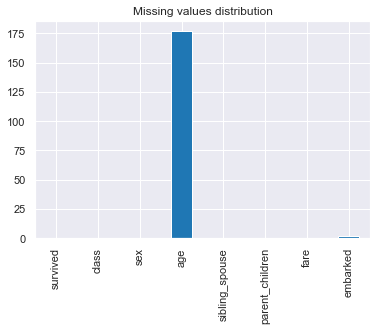

In [10]:
df_train.isnull().sum().plot(kind="bar")
plt.title("Missing values distribution")

Found missing values in columns: age and embarked. I'll replace null values in age and embarked, so not to loose any valuable information.

In [11]:
df_train["embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

[Text(0, 0, 'Southampton'), Text(1, 0, 'Cherbourg'), Text(2, 0, 'Queenstown')]

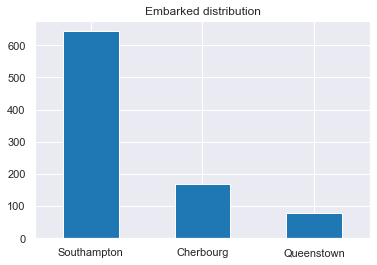

In [12]:
ax = df_train["embarked"].value_counts().plot(kind="bar")
plt.title("Embarked distribution")
ax.set_xticklabels(["Southampton", "Cherbourg", "Queenstown"], rotation = 0)

This bar plot informs us that most of the Titanic passengers were embarked on Southampton port. In this case S (Southampton) will be a mode (aka the value that appears most frequently in a data set).

Text(0.5, 1.0, 'Age distribution')

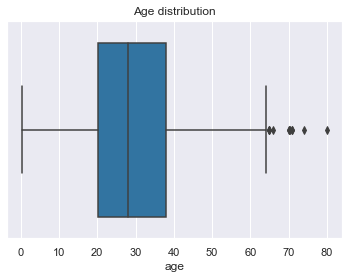

In [13]:
sns.boxplot(x=df_train["age"])
plt.title("Age distribution")

In [14]:
age_median = df_train["age"].median()
print(age_median)

28.0


#### Replacing missing values with median (age) and mode (embarked):

In [15]:
df_train["age"] = df_train["age"].fillna(age_median)

df_train["embarked"] = df_train["embarked"].fillna("S")

#### Doing the same for test set:

In [16]:
df_test["age"] = df_test["age"].fillna(age_median)
df_test["embarked"] = df_test["embarked"].fillna("S")

## Exploratory data analysis (EDA)

### 1. Class

In [17]:
df_train["class"].unique()

array([3, 1, 2], dtype=int64)

[Text(0, 0, '3rd'), Text(1, 0, '2nd'), Text(2, 0, '1st')]

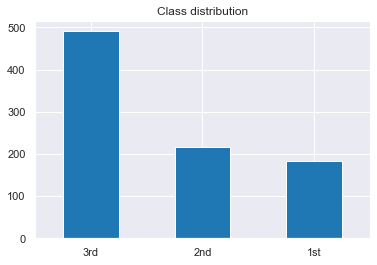

In [18]:
ax = df_train["class"].value_counts().plot(kind="bar")
plt.title("Class distribution")
ax.set_xticklabels(["3rd", "2nd", "1st"], rotation = 0)

#### Showing graph of survival distribution within classes:

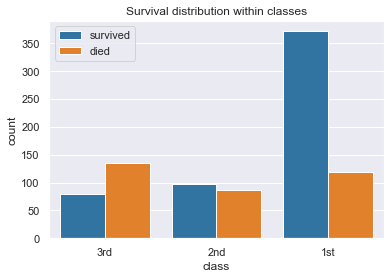

In [19]:
ax = sns.countplot(x=df_train["class"], hue=df_train["survived"])
plt.title("Survival distribution within classes")
ax.set_xticklabels(["3rd", "2nd", "1st"], rotation = 0)
plt.legend(labels=['survived', 'died'])

#### Counting percentage of passengers in each class who survived:

In [20]:
df_train.groupby("class").survived.value_counts(normalize=True).sort_index()

class  survived
1      0           0.370370
       1           0.629630
2      0           0.527174
       1           0.472826
3      0           0.757637
       1           0.242363
Name: survived, dtype: float64

The above graph and table show that 1st class passengers had the highest chance of survival (62.96%), whereas 3rd class passengers the lowest (24,23%).

### 2. Sex

In [21]:
df_train["sex"].unique()

array(['male', 'female'], dtype=object)

<AxesSubplot:title={'center':'Sex distribution'}, ylabel='sex'>

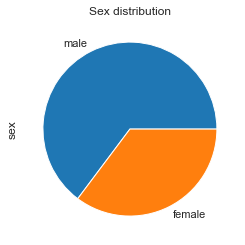

In [22]:
plt.title("Sex distribution")
df_train["sex"].value_counts().plot(kind="pie")

#### Showing graph of survival distribution for each sex:

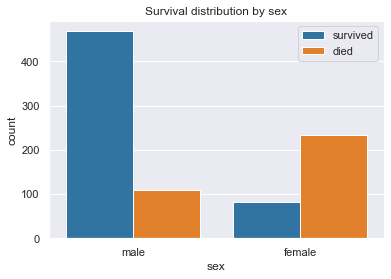

In [23]:
sns.countplot(x=df_train["sex"], hue=df_train["survived"])
plt.title("Survival distribution by sex")
plt.legend(labels=['survived', 'died'])

#### And the percentage...

In [24]:
df_train.groupby("sex").survived.value_counts(normalize=True).sort_index()

sex     survived
female  0           0.257962
        1           0.742038
male    0           0.811092
        1           0.188908
Name: survived, dtype: float64

We can see that generally women had higher chance of survival (74.20%) than men (18.89%).

#### What about survival distribution by both sex and class?

Text(0.5, 1.0, 'Survival ratio by passenger class and sex')

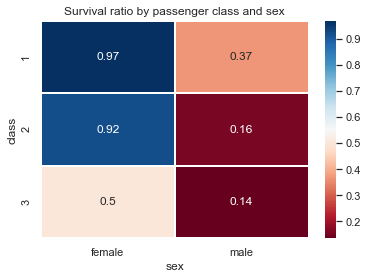

In [25]:
sns.heatmap(df_train.pivot_table(index="class", columns="sex", values="survived"),  linewidths=1, cmap='RdBu', linecolor='white', annot=True)
plt.title("Survival ratio by passenger class and sex")

From the heatmap we conclude that women in the 1st class had the highest chance of survival (97%), whereas men in the 3rd class had the lowest chance of survival (14%). Note that women in each class had higher survival ratio. Even women from 3rd class had greater chance of surviving the catastrophe than men from 1st class.

#### Let's see what it looks like in bar charts:

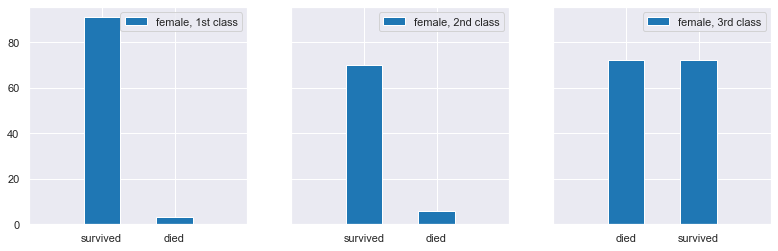

In [26]:
fig=plt.figure(figsize=(18,4))

ax1=fig.add_subplot(141)
female_1st_class = df_train["survived"][df_train["sex"] == 'female'][df_train["class"] == 1].value_counts()
female_1st_class.plot(kind='bar', label='female, 1st class')
ax1.set_xticklabels(["survived", "died"], rotation=0)
ax1.set_xlim(-1, len(female_1st_class))
plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_2nd_class = df_train["survived"][df_train["sex"] == 'female'][df_train["class"] == 2].value_counts()
female_2nd_class.plot(kind='bar', label='female, 2nd class')
ax2.set_xticklabels(["survived","died"], rotation=0)
ax2.set_xlim(-1, len(female_2nd_class))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
female_3rd_class = df_train["survived"][df_train["sex"] == 'female'][df_train["class"] == 3].value_counts()
female_3rd_class.plot(kind='bar', label='female, 3rd class')
ax3.set_xticklabels(["died","survived"], rotation=0)
ax3.set_xlim(-1, len(female_3rd_class))
plt.legend(loc='best')

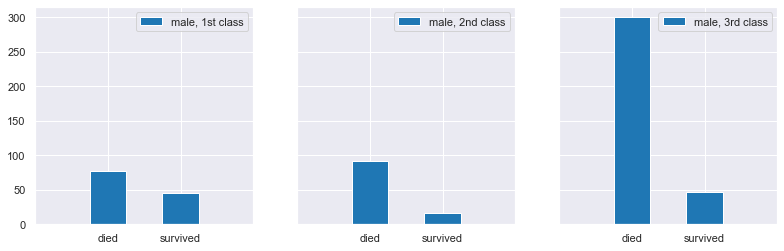

In [27]:
fig=plt.figure(figsize=(18,4))

ax1=fig.add_subplot(141)
male_1st_class = df_train["survived"][df_train["sex"] == 'male'][df_train["class"] == 1].value_counts()
male_1st_class.plot(kind='bar', label='male, 1st class')
ax1.set_xticklabels(["died", "survived"], rotation=0)
ax1.set_xlim(-1, len(male_1st_class))
plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
male_2nd_class = df_train["survived"][df_train["sex"] == 'male'][df_train["class"] == 2].value_counts()
male_2nd_class.plot(kind='bar', label='male, 2nd class')
ax2.set_xticklabels(["died","survived"], rotation=0)
ax2.set_xlim(-1, len(male_2nd_class))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_3rd_class = df_train["survived"][df_train["sex"] == 'male'][df_train["class"] == 3].value_counts()
male_3rd_class.plot(kind='bar', label='male, 3rd class')
ax3.set_xticklabels(["died","survived"], rotation=0)
ax3.set_xlim(-1, len(male_3rd_class))
plt.legend(loc='best')

### 3. Age

<AxesSubplot:title={'center':'Age distribution'}, ylabel='Frequency'>

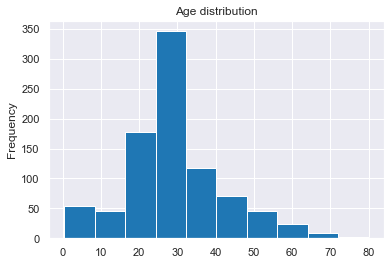

In [28]:
plt.title("Age distribution")
df_train["age"].plot(kind="hist")

#### Showing a violin plot of age distribution within classes:

[Text(0, 0, '1st'), Text(1, 0, '2nd'), Text(2, 0, '3rd')]

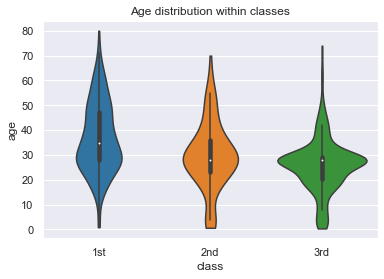

In [29]:
ax = sns.violinplot(x="class", y="age", data=df_train, cut=0)
plt.title("Age distribution within classes")
ax.set_xticklabels(["1st", "2nd", "3rd"], rotation=0)

Younger passengers were more often in the 3rd class.

#### And a violin plot for age and sex within classes...

[Text(0, 0, '1st'), Text(1, 0, '2nd'), Text(2, 0, '3rd')]

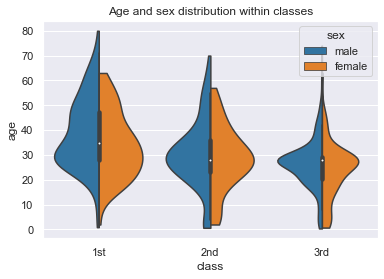

In [30]:
ax = sns.violinplot(x="class", y="age", hue="sex",
                    data=df_train, split=True, cut=0)
plt.title("Age and sex distribution within classes")
ax.set_xticklabels(["1st", "2nd", "3rd"], rotation=0)

#### Showing a violin plot of survival by age:

[Text(0, 0, 'Died'), Text(1, 0, 'Survived')]

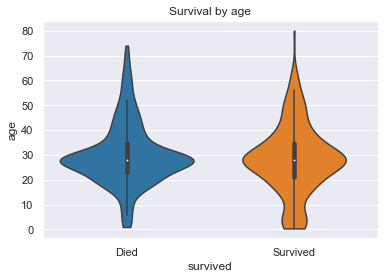

In [31]:
ax = sns.violinplot(x="survived", y="age", data=df_train, cut=0)
plt.title("Survival by age")
ax.set_xticklabels(["Died", "Survived"], rotation=0)

### 4. Embarked

#### Showing graph of survival distribution for each port of embarkation:

[Text(0, 0, 'Southampton'), Text(1, 0, 'Cherbourg'), Text(2, 0, 'Queenstown')]

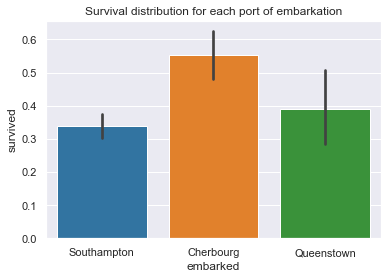

In [32]:
ax = sns.barplot(x="embarked", y="survived", data=df_train)
plt.title("Survival distribution for each port of embarkation")
ax.set_xticklabels(["Southampton", "Cherbourg", "Queenstown"], rotation = 0)

From the above bar plot we can see that passengers embarked on Cherbourg had the highest survival rate and those embarked on Southampton the lowest.

#### Let's look at survival distribution by passenger class and port of embarkation:

Text(0.5, 1.0, 'Survival ratio by passenger class and port of embarkation')

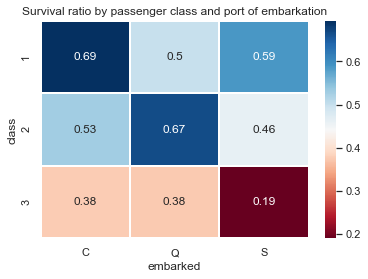

In [33]:
sns.heatmap(df_train.pivot_table(index="class", columns="embarked", values="survived"),  linewidths=1, cmap='RdBu', linecolor='white', annot=True)
plt.title("Survival ratio by passenger class and port of embarkation")

The heatmap shows however that in the 2nd class, passengers embarked on Queenstown had higher survival chance than those embarked on Cherbourg.

#### What about survival distribution by sex and port of embarkation?

Text(0.5, 1.0, 'Survival ratio by sex and port of embarkation')

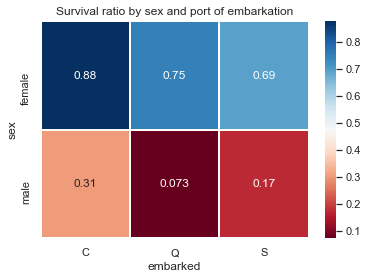

In [34]:
sns.heatmap(df_train.pivot_table(index="sex", columns="embarked", values="survived"), linewidths=1, cmap='RdBu', linecolor='white', annot=True)
plt.title("Survival ratio by sex and port of embarkation")

Male passengers embarked on Queenstown had a drastically low chance of survival (less than 1%).

### 5. Fare price

<AxesSubplot:title={'center':'Fare price distribution'}, ylabel='Frequency'>

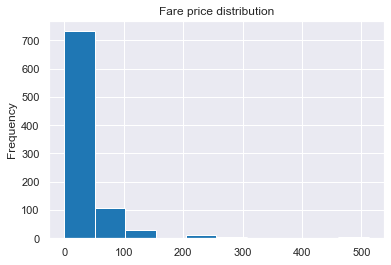

In [35]:
plt.title("Fare price distribution")
df_train["fare"].plot(kind="hist")

#### Showing graph of survival by fare price:

[Text(0, 0, 'Died'), Text(1, 0, 'Survived')]

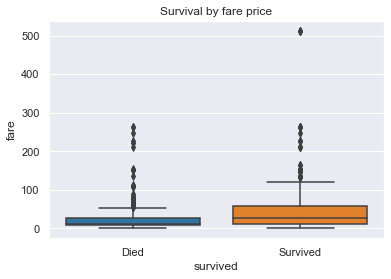

In [36]:
ax = sns.boxplot(x="survived", y="fare", data=df_train)
plt.title("Survival by fare price")
ax.set_xticklabels(["Died", "Survived"], rotation = 0)

Passengers with more expensive fare price survived more often.

### 6. Sibling/spouse

In [37]:
df_train.sibling_spouse.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [38]:
df_train.groupby("sibling_spouse").survived.value_counts(normalize=True).sort_index()

sibling_spouse  survived
0               0           0.654605
                1           0.345395
1               0           0.464115
                1           0.535885
2               0           0.535714
                1           0.464286
3               0           0.750000
                1           0.250000
4               0           0.833333
                1           0.166667
5               0           1.000000
8               0           1.000000
Name: survived, dtype: float64

#### Showing graph of survival by number of siblings/spouses aboard the Titanic:

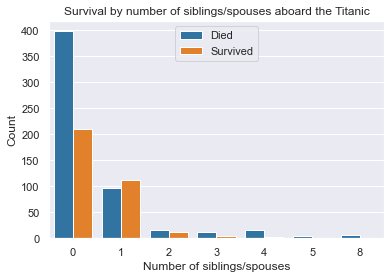

In [39]:
sns.countplot(x="sibling_spouse", hue="survived", data=df_train)
plt.ylabel("Count")
plt.xlabel("Number of siblings/spouses")
plt.title("Survival by number of siblings/spouses aboard the Titanic")
plt.legend(("Died", "Survived")) 

#### The same graph, but only for male passengers:

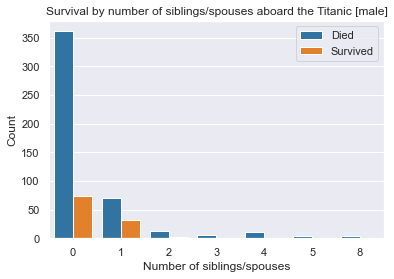

In [40]:
df_male = df_train[df_train.sex=='male']
sns.countplot(x="sibling_spouse", hue="survived", data=df_male)
plt.ylabel("Count")
plt.xlabel("Number of siblings/spouses")
plt.title("Survival by number of siblings/spouses aboard the Titanic [male]")
plt.legend(("Died", "Survived"), loc="upper right") 

#### And for female passengers:

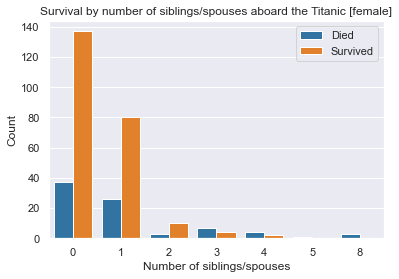

In [41]:
df_female = df_train[df_train.sex=='female']
sns.countplot(x="sibling_spouse", hue="survived", data=df_female)
plt.ylabel("Count")
plt.xlabel("Number of siblings/spouses")
plt.title("Survival by number of siblings/spouses aboard the Titanic [female]")
plt.legend(("Died", "Survived"), loc="upper right") 

#### And now a heatmap:

Text(0.5, 1.0, 'Survival ratio by sex and number of siblings/spouses')

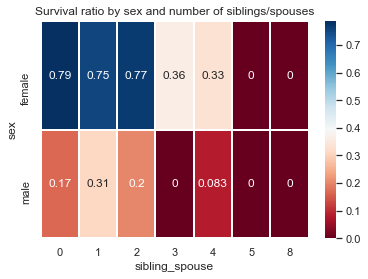

In [42]:
sns.heatmap(df_train.pivot_table(index="sex", columns="sibling_spouse", values="survived"), linewidths=1, cmap='RdBu', linecolor='white', annot=True)
plt.title("Survival ratio by sex and number of siblings/spouses")

Female passengers who had lower number of siblings/spouses (0, 1 or 2) had the highest survival chance. Regardless of sex, passengers with 5 or 8 siblings/spouses had no chance of survival at all.

### 7. Parent/children

In [43]:
df_train.parent_children.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [44]:
df_train.groupby("parent_children").survived.value_counts(normalize=True).sort_index()

parent_children  survived
0                0           0.656342
                 1           0.343658
1                0           0.449153
                 1           0.550847
2                0           0.500000
                 1           0.500000
3                0           0.400000
                 1           0.600000
4                0           1.000000
5                0           0.800000
                 1           0.200000
6                0           1.000000
Name: survived, dtype: float64

#### Showing graph of survival by number of parents/children aboard the Titanic:

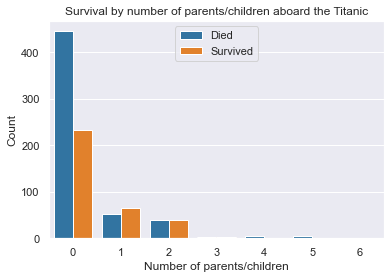

In [45]:
sns.countplot(x="parent_children", hue="survived", data=df_train)
plt.ylabel("Count")
plt.xlabel("Number of parents/children")
plt.title("Survival by number of parents/children aboard the Titanic")
plt.legend(("Died", "Survived")) 

#### The same graph, but only for male passengers:

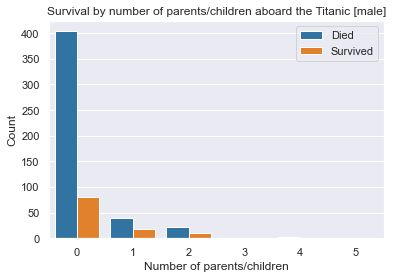

In [46]:
df_male = df_train[df_train.sex=='male']
sns.countplot(x="parent_children", hue="survived", data=df_male)
plt.ylabel("Count")
plt.xlabel("Number of parents/children")
plt.title("Survival by number of parents/children aboard the Titanic [male]")
plt.legend(("Died", "Survived"), loc="upper right") 

#### And for female passengers:

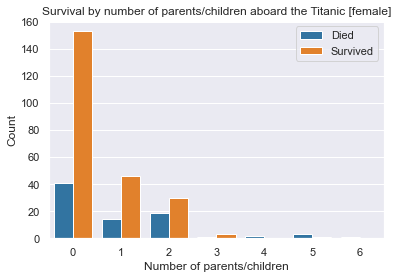

In [47]:
df_female = df_train[df_train.sex=='female']
sns.countplot(x="parent_children", hue="survived", data=df_female)
plt.ylabel("Count")
plt.xlabel("Number of parents/children")
plt.title("Survival by number of parents/children aboard the Titanic [female]")
plt.legend(("Died", "Survived"), loc="upper right") 

#### And now a heatmap:


Text(0.5, 1.0, 'Survival ratio by sex and number of parents/children')

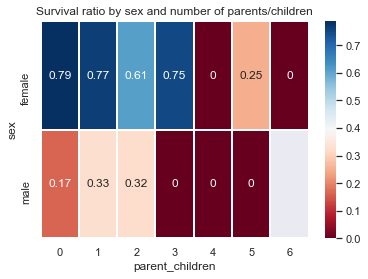

In [48]:
sns.heatmap(df_train.pivot_table(index="sex", columns="parent_children", values="survived"), linewidths=1, cmap='RdBu', linecolor='white', annot=True)
plt.title("Survival ratio by sex and number of parents/children")

Female passengers had the highest survival chance when they travelled alone, whereas childless male passengers had lower chance of survival than those who travelled with their family. 

## Data Preparation

Machine learning algorithms require data to be numbers, so I'm going to replace "male" with 0 and "female" with 1. I'll also generate dummy variables for column "embarked".

#### Replacing qualitative data in train set with numbers:

In [50]:
df_train.sex.replace({"male":0, "female":1}, inplace=True)
df_train = pd.concat([df_train, pd.get_dummies(df_train["embarked"], prefix="embarked")], axis=1)
df_train = df_train.drop(["embarked"], axis=1)

In [51]:
df_train.head()

,survived,class,sex,age,sibling_spouse,parent_children,fare,embarked_C,embarked_Q,embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


#### Doing the same for test set:

In [52]:
df_test.sex.replace({"male":0, "female":1}, inplace=True)
df_test= pd.concat([df_test, pd.get_dummies(df_test["embarked"], prefix="embarked")], axis=1)
df_test= df_test.drop(["embarked"], axis=1)

In [53]:
df_test.head()

,class,sex,age,sibling_spouse,parent_children,fare,embarked_C,embarked_Q,embarked_S
0,3,0,34.5,0,0,7.8292,0,1,0
1,3,1,47.0,1,0,7.0000,0,0,1
2,2,0,62.0,0,0,9.6875,0,1,0
3,3,0,27.0,0,0,8.6625,0,0,1
4,3,1,22.0,1,1,12.2875,0,0,1


Now, that all the values are numerical, I can calculate feature correlations with Pearson correlation coefficient.

#### Displaying Pearson Correlation of Features:

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

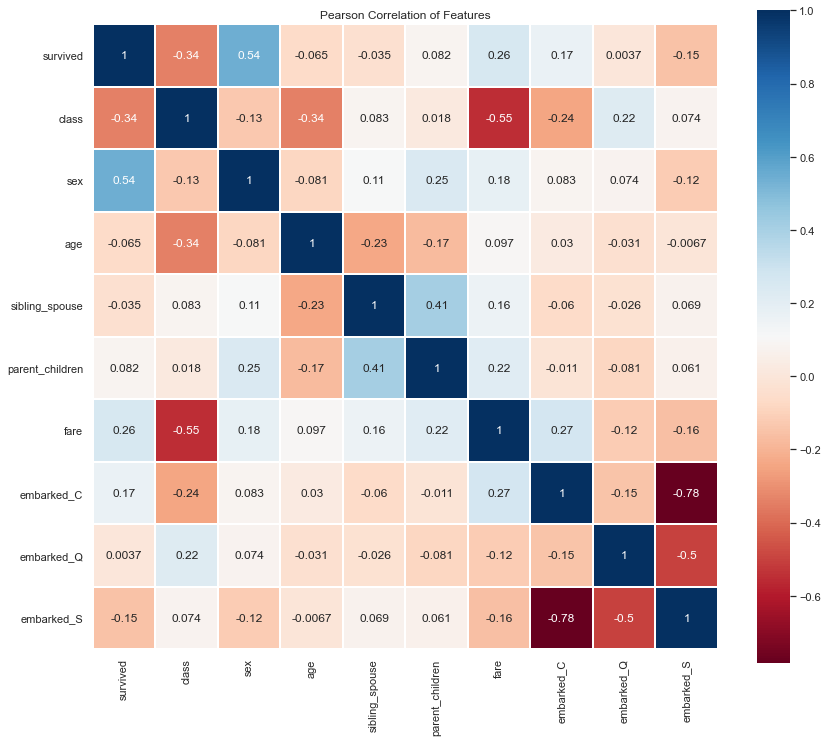

In [54]:
plt.figure(figsize=(14,12))
plt.title("Pearson Correlation of Features")
sns.heatmap(df_train.corr(),linewidths=1,
            square=True, cmap='RdBu', linecolor='white', annot=True)

## Modeling

In [55]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()